In [133]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import Image # 쥬피터 노트북에 사진 삽입을 위한 모듈 임포트

In [134]:
data = pd.read_csv("C:/Users/joyh1/worldcup_predict_younghun/results.csv")
data.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [135]:
data.shape

(41540, 9)

In [136]:
data.tail()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
41535,2019-11-19,Kyrgyzstan,Tajikistan,1,1,FIFA World Cup qualification,Bishkek,Kyrgyzstan,False
41536,2019-11-19,Vietnam,Thailand,0,0,FIFA World Cup qualification,Hanoi,Vietnam,False
41537,2019-11-19,Malaysia,Indonesia,2,0,FIFA World Cup qualification,Kuala Lumpur,Malaysia,False
41538,2019-11-19,Turkmenistan,Sri Lanka,2,0,FIFA World Cup qualification,Ashgabat,Turkmenistan,False
41539,2019-11-19,Lebanon,North Korea,0,0,FIFA World Cup qualification,Beirut,Lebanon,False


In [137]:
data.isnull().sum()

date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
city          0
country       0
neutral       0
dtype: int64

In [138]:
type(data['home_score'][0]) # score칼럼의 형태는 정수형이므로 밑에서 조건문을 달 때 대소비교(<,>)를 할 수 있을 것이다.

numpy.int64

In [139]:
# 홈스코어 어웨이 스코어를 비교해서 승/패자 값을 가린 후 winning_team이라는 새로운 칼럼에 추가하기

winner = [] # 빈리스트를 설정하고 값을 채운후 data라는 dataframe에 새로운 칼럼으로 추가할 예정
for i in range(len(data['date'])):
    if data['home_score'][i] > data['away_score'][i]:
        winner.append(data['home_team'][i])
    elif data['home_score'][i] < data['away_score'][i]:
        winner.append(data['away_team'][i])
    else:
        winner.append("Tie")
        
data['winning_team'] = winner

data.head()                # 원하는 대로 '승팀' 칼럼을 추가

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,winning_team
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,Tie
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,England
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,Scotland
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,Tie
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,Scotland


In [140]:
# 필요 없다고 생각되는 tournament, city 칼럼 삭제
data = data.drop(['tournament', 'city'], axis=1)
data.head()

,date,home_team,away_team,home_score,away_score,country,neutral,winning_team
0,1872-11-30,Scotland,England,0,0,Scotland,False,Tie
1,1873-03-08,England,Scotland,4,2,England,False,England
2,1874-03-07,Scotland,England,2,1,Scotland,False,Scotland
3,1875-03-06,England,Scotland,2,2,England,False,Tie
4,1876-03-04,Scotland,England,3,0,Scotland,False,Scotland


In [141]:
# date 칼럼의 값들을 연도만 나타내는 걸로 변환
data['date'] = pd.to_datetime(data['date'])
data['date'] = data['date'].dt.strftime('%Y')
data.head()

,date,home_team,away_team,home_score,away_score,country,neutral,winning_team
0,1872,Scotland,England,0,0,Scotland,False,Tie
1,1873,England,Scotland,4,2,England,False,England
2,1874,Scotland,England,2,1,Scotland,False,Scotland
3,1875,England,Scotland,2,2,England,False,Tie
4,1876,Scotland,England,3,0,Scotland,False,Scotland


In [142]:
# date 칼럼 값들을 int형으로 바꿔줌(현재 str임)
data = data.astype({'date' : int})

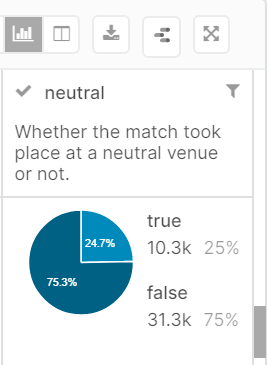

In [143]:
Image("C:/neutral.png") # kaggle에서 가져온 해당 데이터의 neutral 칼럼에 대한 설명

###### 해당 'netural' 칼럼의 값이 True라는 것에 대한 의미 :  축구 경기가 열리는 장소가 홈/어웨이 팀  어느 곳에 속하지 않고 다른 중립적인(제 3자) 장소에서 개최된 것을 말함
###### 그런데 해당 칼럼에 대한 값의 비율을 보면 약 4만개의 값 중 75%가 False인걸 감안하면 대부분의 경기가 홈/ 어웨이 장소 중 하나에서 열렸음을 알 수있다.

## 그렇다면 netural 칼럼의 값을 기준으로 세가지 종류의 데이터로 나누어 보자
### 1. 값이 False 로만 이루어져 있는 데이터
### 2. 값이 True 로만 이루어져 있는 데이터
### 3. 값이 True, Fales 모두 이루어져 있는 데이터(=데이터 원본)

In [144]:
# 우선 neutral 칼럼의 값들 형태가 string인지 boolean인지 확인 부터 해보자
type(data['neutral'][0])

numpy.bool_

In [145]:
# 1번 데이터 - True 갯수
data_all = data
len(data_all[data_all['neutral'] == True])

10251

In [146]:
# 1번 데이터 - False 갯수
len(data_all[data_all['neutral'] == False])

31289

In [147]:
# 2번 데이터
data_false = data_all[data_all['neutral'] == False]

    # 2번 데이터에서 정말 False값만 추출됬는지 확인하기
len(data_false[data_false['neutral'] == True])

0

In [148]:
# 3번 데이터
data_true = data_all[data_all['neutral'] == True]

    # 3번 데이터에서 정말 True값만 추출됬는지 확인하기
len(data_true[data_true['neutral'] == False])

0

### ▶임의로 특정한 한 국가 'England' 를 정해서 해당 국가의 승패 승률을 데이터 3개의 종류별로 알아보자

In [149]:
# 1번 데이터에서 England가 치른 경기만 추출
data_all_england = data_all[(data_all['home_team'] == 'England') | (data_all['away_team'] == 'England')]
data_all_england.head()

,date,home_team,away_team,home_score,away_score,country,neutral,winning_team
0,1872,Scotland,England,0,0,Scotland,False,Tie
1,1873,England,Scotland,4,2,England,False,England
2,1874,Scotland,England,2,1,Scotland,False,Scotland
3,1875,England,Scotland,2,2,England,False,Tie
4,1876,Scotland,England,3,0,Scotland,False,Scotland


In [150]:
# England만을 담은 1번 데이터 갯수
data_all_england.shape

(1009, 8)

In [151]:
# 2번 데이터에서 England가 치른 경기만 추출
data_false_england = data_false[(data_false['home_team'] == 'England') | (data_false['away_team'] == 'England')]
data_false_england.head()

,date,home_team,away_team,home_score,away_score,country,neutral,winning_team
0,1872,Scotland,England,0,0,Scotland,False,Tie
1,1873,England,Scotland,4,2,England,False,England
2,1874,Scotland,England,2,1,Scotland,False,Scotland
3,1875,England,Scotland,2,2,England,False,Tie
4,1876,Scotland,England,3,0,Scotland,False,Scotland


In [152]:
# England만을 담은 2번 데이터 갯수
data_false_england.shape

(902, 8)

In [153]:
# 3번 데이터에서 England가 치른 경기만 추출
data_true_england = data_true[(data_true['home_team'] == 'England') | (data_true['away_team'] == 'England')]
data_true_england.head()

,date,home_team,away_team,home_score,away_score,country,neutral,winning_team
3113,1950,Chile,England,0,2,Brazil,True,England
3121,1950,England,United States,0,1,Brazil,True,United States
3127,1950,England,Spain,0,1,Brazil,True,Spain
3646,1954,Belgium,England,4,4,Switzerland,True,Tie
3660,1954,England,Uruguay,2,4,Switzerland,True,Uruguay


In [154]:
# England만을 담은 3번 데이터 갯수
data_true_england.shape

(107, 8)

In [155]:
type(data_true_england['date'][3113]) # date 칼럼 값 형태가 뭔지 확인

numpy.int32

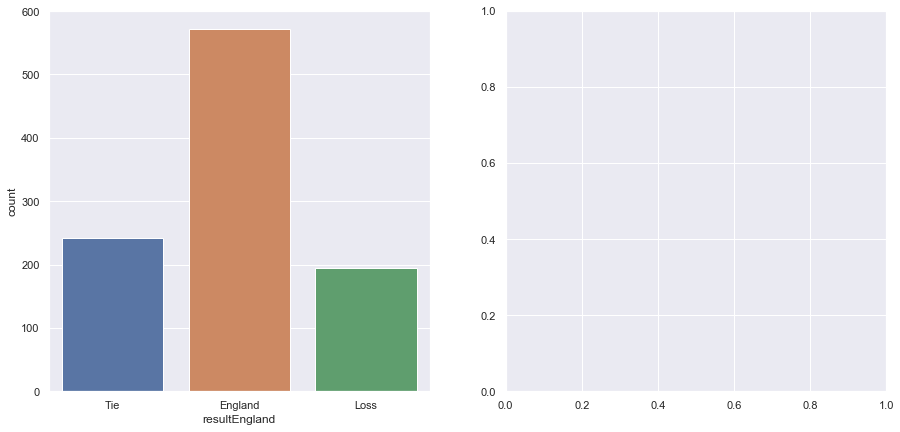

In [159]:
# 1번 데이터로 England 승률 시각화해보기
winrate_all = []
for row in data_all_england['winning_team']:
    if row != 'England' and row != 'Tie':
        winrate_all.append('Loss')
    else:
        winrate_all.append(row)
dfwinrate_all = pd.DataFrame(winrate_all, columns=['resultEngland'])

import matplotlib.ticker as ticker
import matplotlib.ticker as plticker

fig, ax = plt.subplots(1, 2)
fig.set_size_inches(15,7, 5.27)
sns.set(style = 'darkgrid')
sns.countplot(x='resultEngland', data=dfwinrate_all, ax = ax[0])
                                                                            #밑에 그래프는 뭐지;;

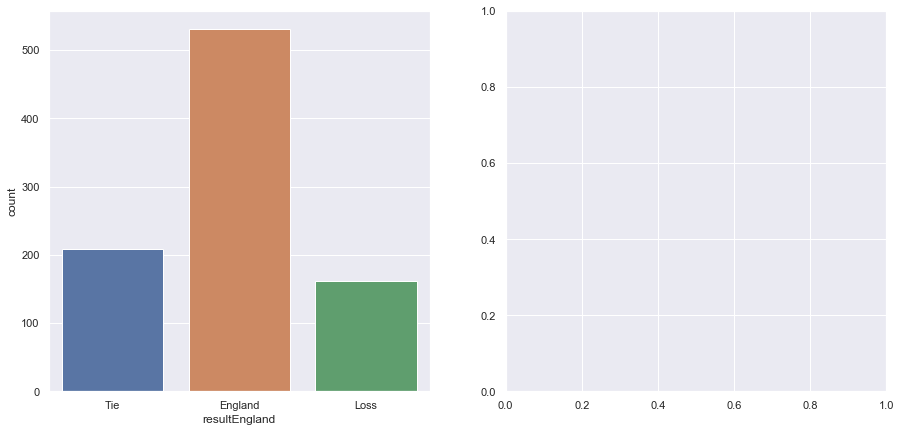

In [160]:
# 2번 데이터로 England 승률 시각화해보기
winrate_false = []
for row in data_false_england['winning_team']:
    if row != 'England' and row != 'Tie':
        winrate_false.append('Loss')
    else:
        winrate_false.append(row)
dfwinrate_false = pd.DataFrame(winrate_false, columns=['resultEngland'])

import matplotlib.ticker as ticker
import matplotlib.ticker as plticker

fig, ax = plt.subplots(1, 2)
fig.set_size_inches(15,7, 5.27)
sns.set(style = 'darkgrid')
sns.countplot(x='resultEngland', data=dfwinrate_false, ax = ax[0])

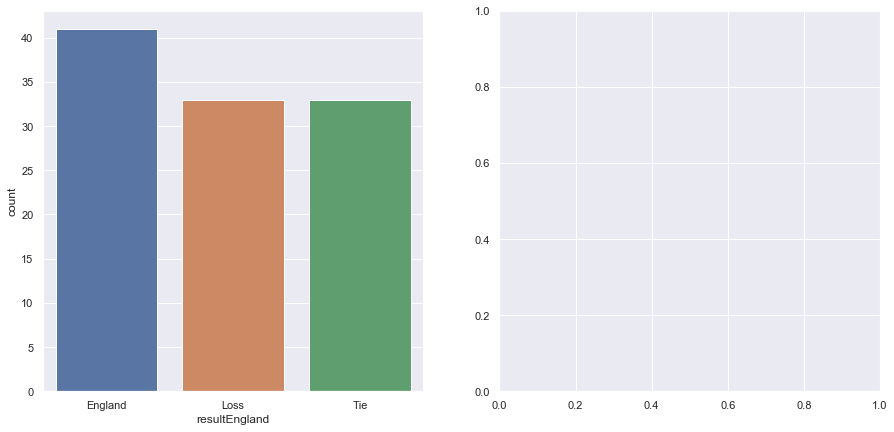

In [163]:
# 3번 데이터로 England 승률 시각화해보기
winrate_true = []
for row in data_true_england['winning_team']:
    if row != 'England' and row != 'Tie':
        winrate_true.append('Loss')
    else:
        winrate_true.append(row)
dfwinrate_true = pd.DataFrame(winrate_true, columns=['resultEngland'])

import matplotlib.ticker as ticker
import matplotlib.ticker as plticker

fig, ax = plt.subplots(1, 2)
fig.set_size_inches(15,7, 5.27)
sns.set(style = 'darkgrid')
sns.countplot(x='resultEngland', data=dfwinrate_true, ax = ax[0])

### ※ 확실히 1번,2번 데이터에서는 England가 홈일 경우(경기가 England에서 열리는 경우)가 승리 비율이 확실히 높다
### ※ 하지만 3번 데이터에서는 England가 어웨이일 경우에는 승리가 더 높긴하지만 1,2번 데이터의 경우에 비해서는 패배와 무승부 비율이 높은편이다 ( ** 물론 3번 데이터의 갯수가 현저히 적긴하다)